In [1]:
import os
os.chdir("/mnt/iusers01/jw01/mdefscs4/ra_challenge/hestia/Hestia_imeche_vision_challenge/NN_recognition_train")

In [2]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as k
import glob
from PIL import Image
import argparse
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from dataset.train_generator import retrieve_tf_dataset
from model.mobile_net import retrieve_mobilenet_model, custom_crossentropy, custom_mse

In [85]:
model = k.models.load_model("weights/step1_default_batchnorm.tf", custom_objects = {"custom_crossentropy": custom_crossentropy, "custom_mse": custom_mse})

In [4]:
tf_data = retrieve_tf_dataset()

In [98]:
for X,Y in tf_data.take(1):
    pass

In [99]:
model.evaluate(tf_data, steps = 10)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 131s 13s/step - loss: 0.3359 - presence_loss: 0.3197 - coordinates_loss: 0.0162 - presence_presence_accuracy: 0.8687


[0.3358815610408783,
 0.319705992937088,
 0.01617560349404812,
 0.8687499761581421]

In [97]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
tf.math.truediv (TFOpLambda)    (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.math.subtract (TFOpLambda)   (None, 224, 224, 3)  0           tf.math.truediv[0][0]            
__________________________________________________________________________________________________
model (Functional)              (None, 14, 14, 6)    317090      tf.math.subtract[0][0]           
____________________________________________________________________________________________

In [11]:
data = np.array(Image.open("../data/grass_pretrain/frame_birch_real_2865.jpeg").resize((224,224), 2)).reshape((1,224,224,3))

In [92]:
res = model(X, training = True)

In [94]:
res = model.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

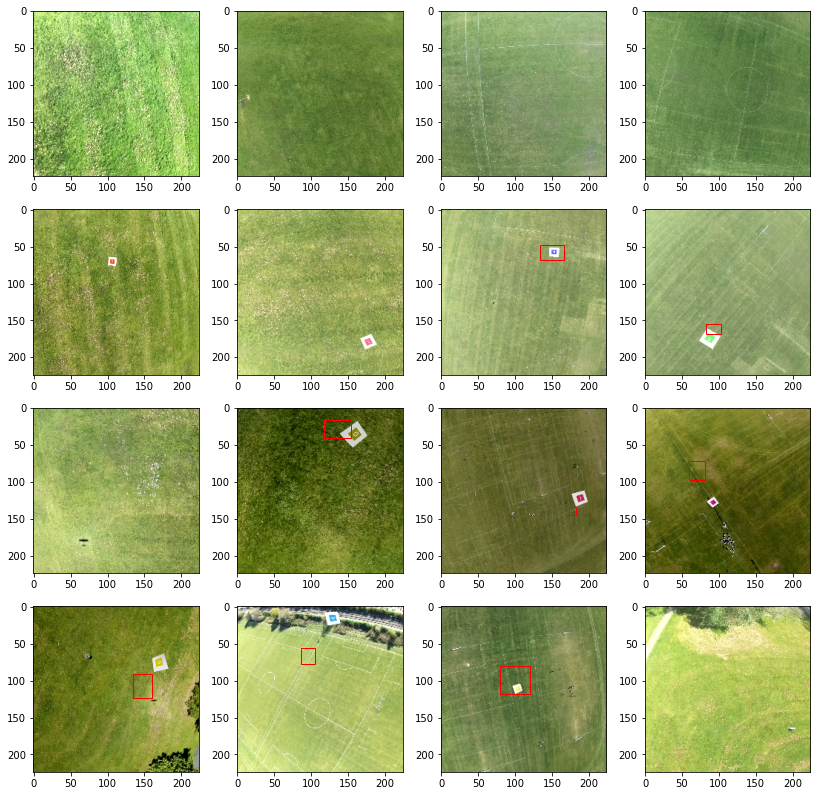

In [96]:
fig, axes  = plt.subplots(4,4, figsize = (14,14))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X[i].numpy().reshape(224,224,3)/255)

    X0 = res[1][i][0] - res[1][i][2]/2
    Y0 = res[1][i][1] - res[1][i][3]/2
    # Create a Rectangle patch
    if res[0][i] > 0.5:
        rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

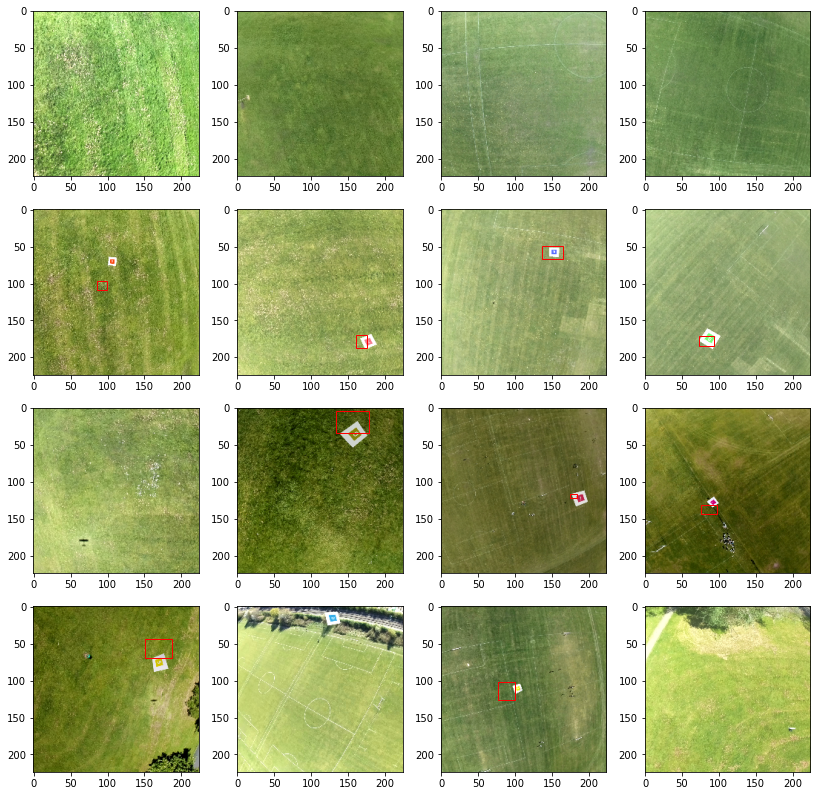

In [93]:
fig, axes  = plt.subplots(4,4, figsize = (14,14))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X[i].numpy().reshape(224,224,3)/255)

    X0 = res[1][i][0] - res[1][i][2]/2
    Y0 = res[1][i][1] - res[1][i][3]/2
    # Create a Rectangle patch
    if res[0][i] > 0.5:
        rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

In [88]:
np.argmax(res[2][0])

31

In [89]:

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [90]:
int_to_char[np.argmax(res[2][0])]

'5'

In [87]:
res

[array([[3.6800325e-02],
        [8.4529817e-03],
        [9.9543816e-01],
        [8.2761049e-04],
        [9.4228983e-04],
        [7.1352720e-04],
        [9.5327616e-01],
        [9.8761988e-01],
        [9.9385154e-01],
        [2.9197993e-06],
        [7.8451633e-04],
        [1.5167892e-03],
        [4.9239397e-03],
        [9.9219608e-01],
        [1.0194182e-03],
        [9.6138787e-01],
        [9.9871105e-01],
        [9.9903500e-01],
        [4.8429102e-02],
        [2.2293925e-02],
        [9.9785733e-01],
        [9.9627459e-01],
        [7.1873260e-01],
        [6.6885293e-02],
        [1.9719020e-01],
        [5.3137869e-02],
        [3.8032238e-05],
        [1.0543168e-03],
        [1.3750494e-03],
        [8.7259650e-02],
        [9.7910613e-01],
        [7.7474117e-04]], dtype=float32),
 array([[-0.33656955,  0.21403967,  0.13279358,  0.07375424],
        [ 0.07190168,  0.60828245,  0.02995274,  0.03539942],
        [ 0.56641626,  0.42613158,  0.0892988 ,  0.07539555

In [45]:
Y

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
       dtype=float32)>,
 <tf.Tensor: shape=(32, 4), dtype=float32, numpy=
 array([[0.54305214, 0.39611456, 0.1423589 , 0.15163006],
        [1.010404  , 0.12204555, 0.13340922, 0.14034222],
        [0.3619167 , 0.24476467, 0.11989287, 0.11599211],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [0.74961734, 0.9900609 , 0.10359631, 0.09251148],
        [       nan,        nan,        nan,        nan],
        [0.8407317 , 0.36445338, 0.20393804, 0.19815691],
        [0.37899357, 0.69693315, 0.0882605 , 0.08664178],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,     

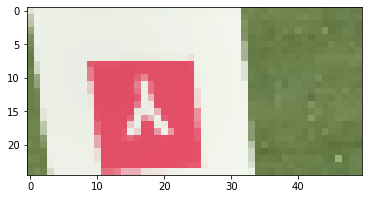

In [69]:
plt.imshow(X[2][75:100,0:50]/255)

In [73]:
res[1][2]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.04299361, 0.37054917, 0.11333504, 0.11964471], dtype=float32)>

In [80]:
np.array(sanitize(res[1][2]))*224

array([ 0.        , 24.51968688, 68.89909808, 97.10693105])

In [75]:
def sanitize(coords):
    A = np.clip(coords[0],0.01,0.99)
    B = np.clip(coords[1],0.01,0.99)
    C = np.clip(coords[2],0.1,0.7)
    D = np.clip(coords[3],0.1,0.7)
    X0 = max(A - D/1.8, 0)
    Y0 = max(B - C/1.8, 0)
    X1 = min(A + D/1.8, 1)
    Y1 = min(B + C/1.8, 1)
    return X0, X1, Y0, Y1